# Week4 App Rating EDA

## 1.Introduction

In this notebook, I will conduct an `exploratory data analysis (EDA)` on `app ratings`, including data preprocess, distribution analysis, and related Hypothesis Testing.


The experience of this project was inspired by my own experience in the field of app development. At the initial stage of app development, developers need to define the target users and market positioning of the product to design the specific framework and functionality. Following that, developers frequently employ techniques like competitive analysis to assist them modify and enhance their apps. However, some independent developers may lack the necessary resources or expertise to collect and analyze data, which could lead to certain design flaws in their apps. Therefore, in this project, I have chosen to study the performance of apps in the application marketplace as the research subject.

For mobile applications, ratings serve as one of the key indicators of an app's success and user satisfaction. And this is the reason why I chose the feature of `rating` as the analysis target. 

After confirming the analysis target, the selection of the datasets began to be considered. Since the app market is primarily divided between `Android` and `iOS` platforms, I have collected separate datasets for each. 

During my analysis, I observed that the rating distributions differ between the two platforms and can be categorized into `continuous statistical distributions` and `discrete statistical distributions`. Leveraging the knowledge from Week 4’s lecture, I applied appropriate `statistical methods`  and `Hypothesis Testing` to analyze the distributions.

Furthermore, `Data visualization` is also an important part of the project. Throughout this notebook, I have utilized `Matplotlib` and `Seaborn` to create various visualizations, including `histograms`, `KDE plots`, and `violin plots`, to effectively interpret the data.

My goal is to `provide a foundational exploration and summary of app rating distributions`, which may help developers evaluate and benchmark their products for further optimization and iteration.

In [2]:
import pandas as pd
import warnings
import numpy as np
import scipy.stats as st
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats._continuous_distns import _distn_names
from scipy.stats import chisquare
import seaborn as sns


matplotlib.style.use('ggplot')

In [3]:
Android_df = pd.read_csv(r'../Datasets\googleplaystore.csv')
Ios_df = pd.read_csv(r"../Datasets\AppleStore.csv")

## 2. Data Selection and Clean

A brief overview of the two datasets.

In [4]:
# Android_df.head()

In [5]:
Ios_df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In the iOS dataset, I found two relevant columns related to Rating: `user_rating_ver` and `user_rating`. According to the column descriptions: 

*  `user_rating_ver` represents the `rating of the current version`.
*  `user_rating` reflects the `average rating across all versions`.

Since my goal is to analyze long-term user feedback, `user_rating` is a more suitable feature, as it captures the overall performance of an app over time. In contrast, `user_rating_ver` might be influenced by short-term fluctuations due to specific version updates. Therefore, I have chosen `user_rating` as the key feature.

In [6]:
print(len(Android_df))
Android_df["App"].nunique()


10841


9660

In [7]:
print(len(Ios_df))
Ios_df['track_name'].nunique()

7197


7195

The `.nunique()` function can identify whether there are duplicate values in the dataset. 

When applying it to the `app name` column in both datasets, I found that duplicate values exsit, especially in the Android dataset. 

Therefore, I performed a deduplication step.

In [8]:
Android_df.drop_duplicates(subset='App', inplace=True)
Ios_df.drop_duplicates(subset='track_name', inplace=True)


In [9]:
# Check if the de-duplication was successful
print('Number of apps in the android dataset : ' , len(Android_df))
print('Number of apps in the Ios dataset : ' , len(Ios_df))

Number of apps in the android dataset :  9660
Number of apps in the Ios dataset :  7195


## 3. Rating Distribution

`Distribution analysis` is a fundamental step in Exploratory Data Analysis (EDA). It provides an intuitive understanding of data patterns, central tendencies, and distribution shapes (e.g., uniform, skewed, or normal).

* In this section, I will analyze how Ratings are distributed in both datasets, compare their characteristics, and summarize key insights. 

* Additionally, I will experiment with different visualization techniques to effectively represent the distributions.

The `histogram` is one of the simplest methods to visualize the distribution of a numerical variable.

I first plotted the distribution of ratings for Android apps. In addition to the basic plot, I incorporated some parameters such as `xlabel` and other `annotation labels`, as well as adjusted the scale of the horizontal axis. 

These modifications helped to enhance the clarity of the plot's visual presentation to a certain extent.


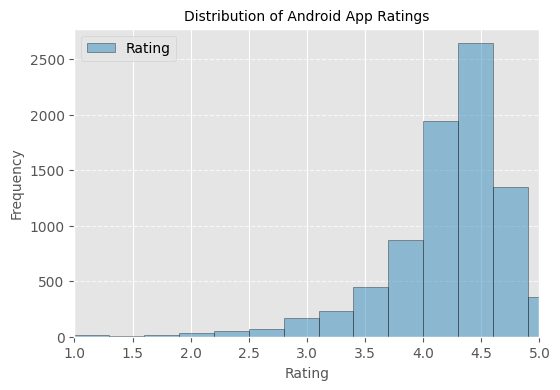

In [10]:
# rating strategy analysis
android_rating = Android_df["Rating"]
android_rating = android_rating.dropna()

plt.figure(figsize=(6,4))
ax = android_rating.plot(kind='hist', bins=60, density=False, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'], edgecolor='black', legend=True)
plt.title("Distribution of Android App Ratings", fontsize=10)
plt.xlabel("Rating", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

# Set the horizontal axis scale (from 1 to 5, interval 0.5)
plt.xlim(1, 5)
plt.xticks(np.arange(1, 5.5, 0.5))

# Add a grid to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


* The underlying distribution of Android app ratings may be closer to a `left-skewed `distribution. Later a function to identify the best-fit distribution will be used.

* The ratings for Android apps are `continuous`, which aligns with the concept of `Continuous Statistical Distributions`.

* Most app ratings are concentrated within the `4.0 - 4.5` range. The number of high-rated apps (those with ratings above 4.5) is noticeably higher than the number of low-rated apps.

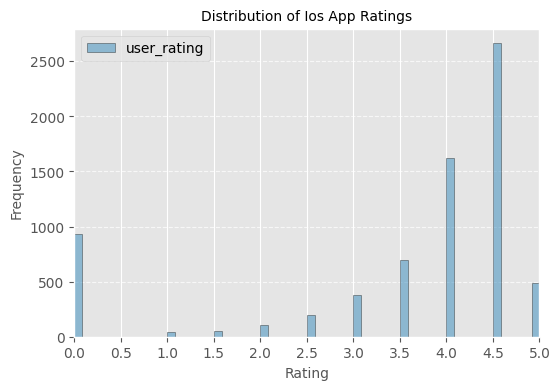

In [11]:
ios_rating = Ios_df["user_rating"]
ios_rating = ios_rating.dropna()


plt.figure(figsize=(6,4))
plt.title("Distribution of Ios App Ratings", fontsize=10)

ax = ios_rating.plot(kind='hist', bins=60, density=False, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'], edgecolor='black', legend=True)
plt.xlabel("Rating", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

# Set the horizontal axis scale (from 1 to 5, interval 0.5)
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5.5, 0.5))

# Add a grid to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


* In contrast, the distribution of iOS app ratings is not continuous and is more suited to `Discrete Statistical` Distributions.

* iOS app ratings are also concentrated between 4.0 and 4.5, similar to Android apps.

However, there are differences between the two app markets. 

* iOS apps have a noticeable number of apps with a rating of 0. 

* There are fewer high-rated iOS apps compared to Android apps, which could potentially reflect differences in user behavior and the rating mechanism.

In [12]:
# Ios app Probability - discrete prob
# ios_app_num = len(ios_rating)
rating_counts = ios_rating.value_counts().sort_index()
rating_probs = rating_counts / rating_counts.sum()
# rating_counts
rating_probs


user_rating
0.0    0.129117
1.0    0.006115
1.5    0.007783
2.0    0.014732
2.5    0.027241
3.0    0.053231
3.5    0.097429
4.0    0.225851
4.5    0.370118
5.0    0.068381
Name: count, dtype: float64

After calculating the probability of iOS app ratings, I discovered that the ratings follow a `discrete distribution` with intervals of 0.5 (excluding the 0.5 rating itself). 

Therefore, the `Probability Mass Function (PMF)` PLOT is more suitable for analyzing iOS app rating.

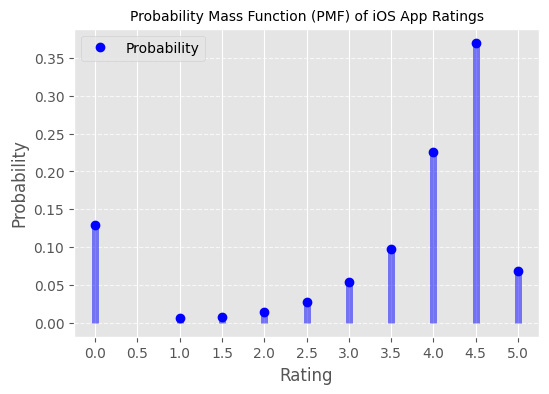

In [13]:
# PMF
x = rating_probs.index
y = rating_probs.values

plt.figure(figsize=(6, 4))
plt.plot(x, y, 'bo', ms=6, label="Probability")  
plt.vlines(x, 0, y, colors='b', lw=5, alpha=0.5)  
plt.xlabel("Rating")
plt.ylabel("Probability")
plt.title("Probability Mass Function (PMF) of iOS App Ratings" , fontsize=10)
plt.xticks(np.arange(0, 5.5, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [14]:
android_average_rating = np.mean(android_rating)
ios_average_rating = np.mean(ios_rating)
print(f'Average android app rating = {round(android_average_rating,2)}')
print(f'Average ios app rating = {round(ios_average_rating,2)}')

Average android app rating = 4.18
Average ios app rating = 3.53


In order to gain a slightly deeper understanding of the differences between the two app markets, I calculated the `average ratings` of both app markets and then observed a noticeable difference. 

The primary reason for this disparity is that the iOS market contains a certain number of apps with a rating of `0`. 

Whether these apps should be treated as outliers and removed depends on the significance of this data, such as whether they represent apps with no user ratings or apps with exceptionally poor user experiences. I will explore this aspect further in subsequent analysis.

## 4. Android App Rating PDF 

For data distribution analysis, using the `Probability Density Function (PDF)` rather than simple counts is a better choice. 

To begin, I will set `density = True` when plotting the histogram. This adjustment ensures that the y-axis represents the probability density, rather than just the count of occurrences.

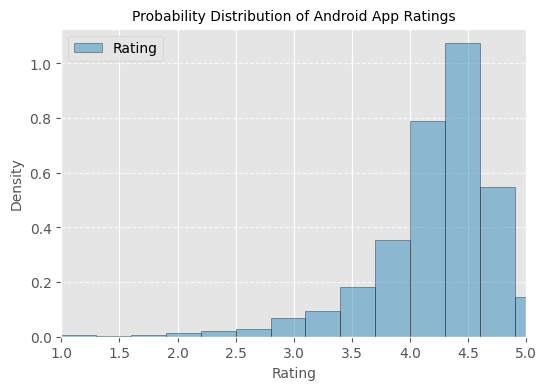

In [15]:
# Probability distribution
plt.figure(figsize=(6,4))
ax = android_rating.plot(kind='hist', bins=60, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'], edgecolor='black', legend=True)

plt.title("Probability Distribution of Android App Ratings", fontsize=10)
plt.xlabel("Rating", fontsize=10)
plt.ylabel("Density", fontsize=10)

# Set the horizontal axis scale (from 1 to 5, interval 0.5)
plt.xlim(1, 5)
plt.xticks(np.arange(1, 5.5, 0.5))

# Add a grid to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


At the same time, I also attempted to use seaborn's `.histplot()` function to plot the histogram. 

By setting `kde=True`, the plot generates a kernel density estimation (KDE) curve, which helps to visualize the distribution trend of the data more smoothly.

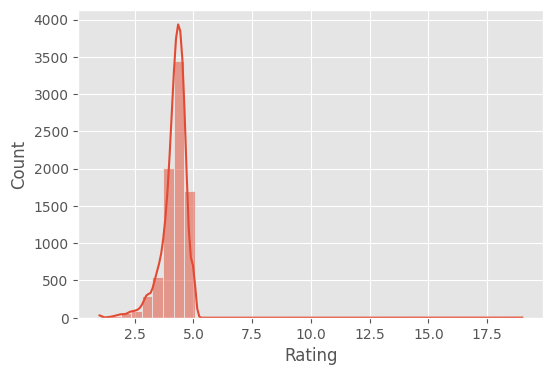

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(android_rating, bins=40, kde=True)
plt.show()

Next, I will use the function introduced in Week 4 to identify the most appropriate distribution for the Android app ratings

In [17]:
# Android Continous prob
# 
def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [18]:
def best_fit_distribution(data, dist_names, bins=200, ax=None, legend=True):
    """Model data by finding best fit distribution to data"""
    #Code adapted from: https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in dist_names if not d in ['levy_stable', 'studentized_range']]):
        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, legend=legend, label=distribution.name)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    return sorted(best_distributions, key=lambda x:x[2])

In [19]:
def compare_and_plot_distributions(data, dist_names, legend=True):
    # Plot for comparison
    plt.figure(figsize=(6,4))
    ax = android_rating.plot(kind='hist', bins=60, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'], edgecolor='black', legend=True)

    # plt.title("Probability Distribution of Android App Ratings", fontsize=10)
    # plt.xlabel("Rating", fontsize=10)
    plt.ylabel("Density", fontsize=10)

    # Set the horizontal axis scale (from 1 to 5, interval 0.5)
    plt.xlim(1, 10)
    plt.xticks(np.arange(1, 10, 0.5))

    # Add a grid to improve readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    

    # Save plot limits
    dataYLim = ax.get_ylim()

    # Find best fit distribution
    best_distibutions = best_fit_distribution(data, dist_names, 200, ax, legend)
    best_dist = best_distibutions[0]

    # Update plots
    ax.set_ylim(dataYLim)

    # Make PDF with best params 
    pdf = make_pdf(best_dist[0], best_dist[1])

    # Display
    plt.figure(figsize=(6,4))
    plt.legend(loc='upper right')
    ax = pdf.plot(lw=1, label='PDF',alpha=0.5, legend=legend)
    ax.set_ylabel('Density')
    data.plot(kind='hist', bins=60, density=True, alpha=0.5, label='Data',edgecolor='black', legend=legend, ax=ax)
    plt.ylabel("Density", fontsize=10)

    # Set the horizontal axis scale (from 1 to 5, interval 0.5)
    plt.xlim(1, 10)
    plt.xticks(np.arange(1, 10, 0.5))

    # Add a grid to improve readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
    dist_str = '{}({})'.format(best_dist[0].name, param_str)

    ax.set_title(u'Best fit distribution \n' + dist_str, fontsize=10)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12432\3445730895.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


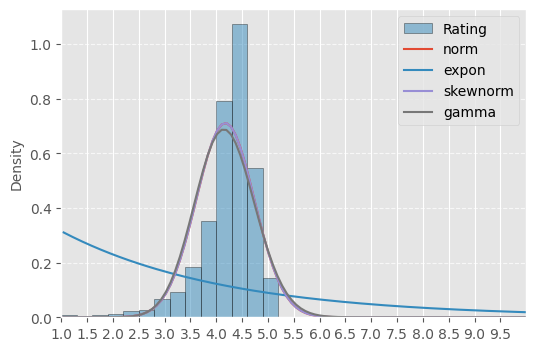

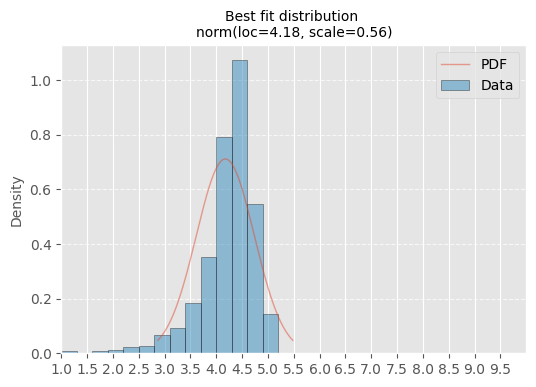

In [20]:
# dist_names = ['norm', 'skewnorm']
dist_names = ['norm', 'expon','skewnorm','gamma']
# compare_and_plot_distributions(android_rating, _distn_names)
compare_and_plot_distributions(android_rating, dist_names)

The best-fit distribution is a `normal distribution`.

* loc = 4.18: This represents the mean (average rating of 4.18).

* scale = 0.56: This indicates the standard deviation (with ratings fluctuating around 4.18, having a standard deviation of 0.56).

## 5. One way anoation - Distribution of Android app Rating by Category

After determining the best - fit distribution of the Android app rating, I had a new question: 

Do ratings differ across app categories?

Upon further exploration, I learned that One-way ANOVA (Analysis of Variance) is a statistical method that can help verify this hypothesis.

One-way ANOVA is a hypothesis test that is suitable for comparing differences between multiple groups. I will treat the `Category` as a categorical variable and the `Rating` as a continuous variable to explore this.

F_onewayResult(statistic=np.float64(12.79263715618054), pvalue=np.float64(2.323280446259348e-20))

The p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis.



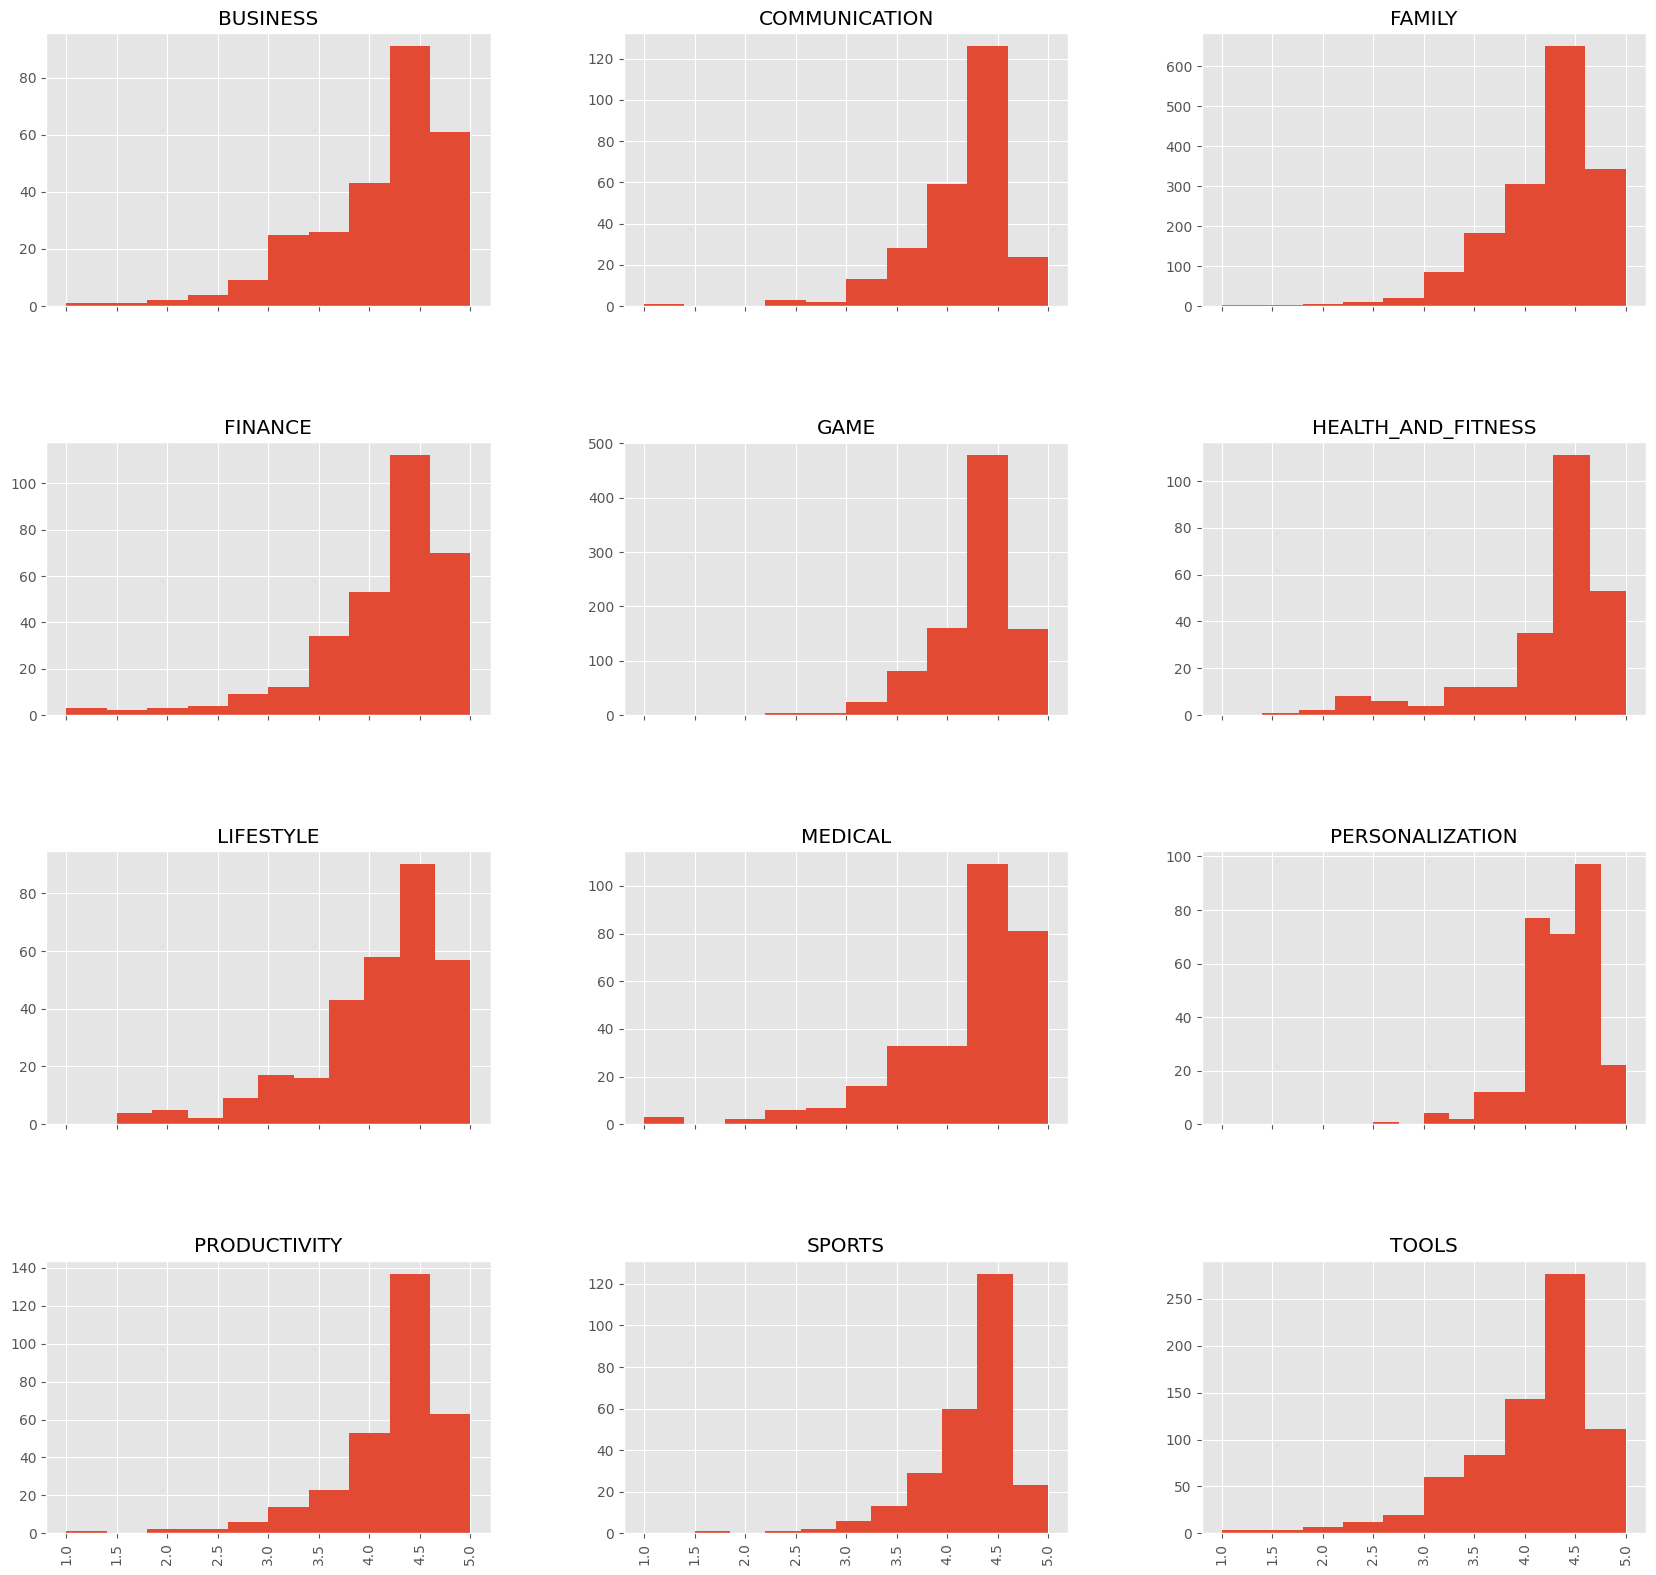

In [21]:
# One way anoation
f = st.f_oneway(Android_df.loc[Android_df.Category == 'BUSINESS']['Rating'].dropna(), 
               Android_df.loc[Android_df.Category == 'FAMILY']['Rating'].dropna(),
               Android_df.loc[Android_df.Category == 'GAME']['Rating'].dropna(),
               Android_df.loc[Android_df.Category == 'PERSONALIZATION']['Rating'].dropna(),
               Android_df.loc[Android_df.Category == 'LIFESTYLE']['Rating'].dropna(),
               Android_df.loc[Android_df.Category == 'FINANCE']['Rating'].dropna(),
               Android_df.loc[Android_df.Category == 'EDUCATION']['Rating'].dropna(),
               Android_df.loc[Android_df.Category == 'MEDICAL']['Rating'].dropna(),
               Android_df.loc[Android_df.Category == 'TOOLS']['Rating'].dropna(),
               Android_df.loc[Android_df.Category == 'PRODUCTIVITY']['Rating'].dropna()
              )

print(f)
print('\nThe p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis.\n')
#temp = df.loc[df.Category.isin(['BUSINESS', 'DATING'])]

groups = Android_df.groupby('Category').filter(lambda x: len(x) > 286).reset_index()
array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20))


Based on the `p-value` and the `plot`, It can be concluded that there are indeed differences in app ratings across different categories.

Next, I used a `violin plot` to further illustrate the distribution of app ratings across the various categories.

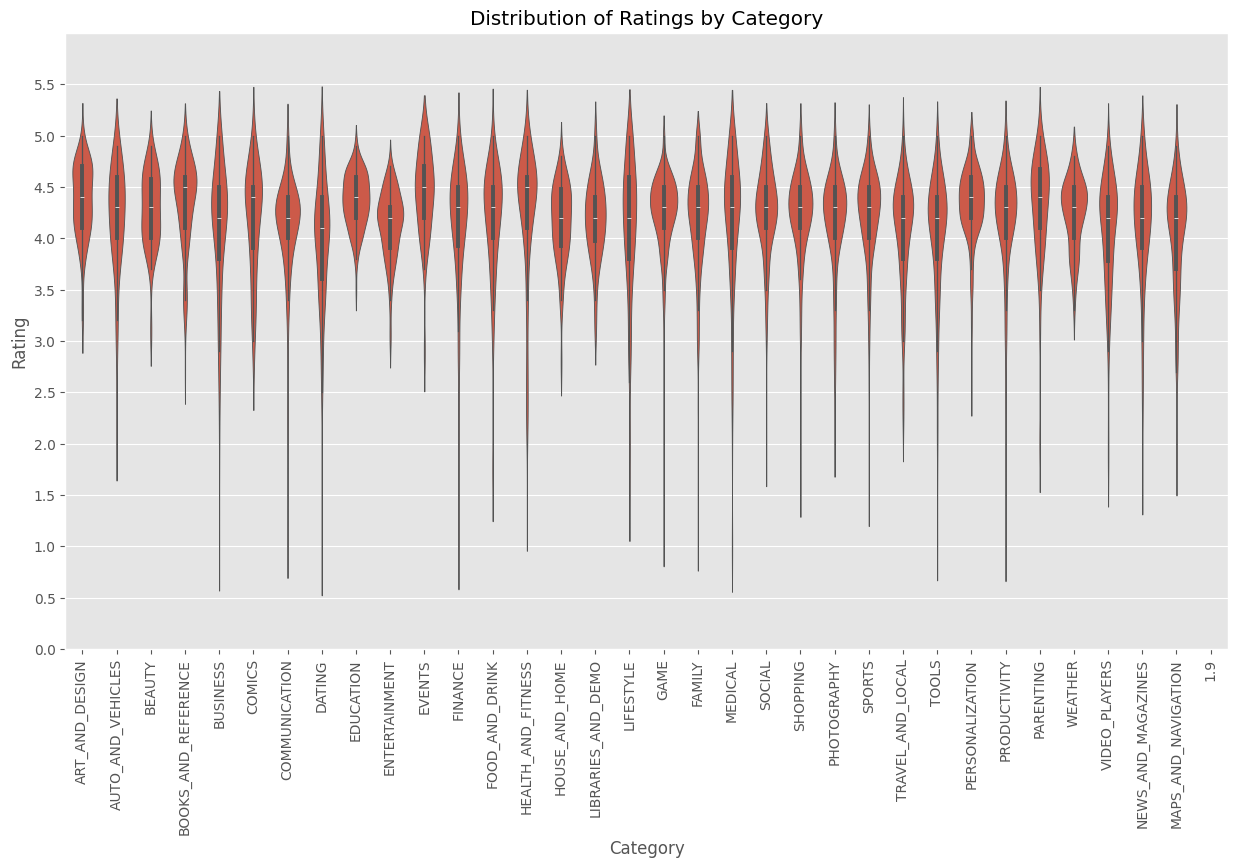

In [22]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='Category', y='Rating', data=Android_df)
plt.xticks(rotation=90)
plt.ylim(0, 6)
plt.yticks(np.arange(0, 6, 0.5))
plt.title('Distribution of Ratings by Category')
plt.show()

* Almost all categories of apps have relatively good ratings.

* Among them, `Events`,`Books and Reference` and `Health and Fitness` have approximately 50% of their apps rated above 4.5.

* This could provide some insights for developers in choosing a specific domain when designing their products.

## 6. Ios App Rating Discrete Possibility

In this section, I primarily applied the Chi-square test to examine whether the iOS app ratings follow the distribution I hypothesized.

First, I selected the data where the iOS ratings were 0 and analyzed whether this subset of data should be retained.

In my hypothesis, if users haven't downloaded these apps, it would indicate they don't have any experience with the app, and thus, the data could be removed. 

However, the iOS app dataset does not contain installation data. So, I shifted my approach and decided to use the number of ratings as a criterion to make this determination.

In [23]:
ios_0_rating = Ios_df[Ios_df["user_rating"] == 0]
ios_0_rating_num = len(ios_0_rating)
free_ios_app = Ios_df[(Ios_df["user_rating"] == 0) & (Ios_df["rating_count_tot"] == 0)]
free_ratio = len(free_ios_app) / ios_0_rating_num
print(f"The percentage of 0 rating count apps is: {free_ratio:.4%}")

The percentage of 0 rating count apps is: 100.0000%


* All apps with a rating of 0 were not actually rated by users, which means these apps have not been used by users. 

* Therefore, in practical application and analysis, it would be reasonable to consider removing these apps from the dataset

In [24]:
Ios_df = Ios_df[Ios_df["user_rating"] != 0]
ios_rating = Ios_df["user_rating"]

The Chi-square test can be used to check whether the data distribution aligns with the hypothesized distribution.

When applying the test, it requires that the sum of the expected frequencies equals the observed frequencies (f_obs). For datasets with a large volume of data, this can sometimes make the test difficult to conduct. 

Therefore, in this case, I opted to input the expected probability array, normalize it so that the total sum of the probabilities equals 1, and then calculate the corresponding frequencies.

In [25]:
f_obs = ios_rating.value_counts().sort_index().values
f_obs

# rating_count = np.array([4,6,12.3,4,6,8,9,10,11])
# f_exp = rating_count

total_count = np.sum(f_obs)
expected_prob = np.array([0.007022,0.008937,0.016917,0.031280,0.061124,0.111874, 0.259336,0.424992,0.078519])

total = expected_prob.sum()
normalized_values = expected_prob / total

f_exp = total_count * normalized_values


In [26]:
chi_stat, p_value = chisquare(f_obs, f_exp)
# chi_stat, p_value = chisquare(f_obs)
print(f"Chi-Square Statistic: {chi_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis that the distribution of scores is different from the expected distribution (significant mismatch).")
else:
    print("The null hypothesis cannot be rejected and the score distribution is likely to conform to the expected distribution.")

Chi-Square Statistic: 0.0000
P-value: 1.0000
The null hypothesis cannot be rejected and the score distribution is likely to conform to the expected distribution.


### Conclusion

In this week's project, I applied the knowledge of data distribution and related Hypothesis Testing for the first time and conducted a practice using app market ratings.

Additionally, I delved deeper into visualization techniques and used methods like histograms, violin plots (for categorical variables), and KDE to better understand the characteristics of the data. I believe that choosing the right visualization method can help us better understand the data structure and support subsequent hypothesis testing or modeling.

Moreover, regarding hypothesis testing, I also applied the Chi-Square Test, which tests whether the iOS rating's distribution is as hypothesized, and One-Way ANOVA, which analyzes the rating differences across categories. Through these statistical tests, I learned how to select the appropriate hypothesis test based on data distribution types and research purpose. In fact, they expanded the research outcomes of my project and ensured the accuracy of the research conclusions.

Overall, through this project, I gained a better understanding of the basic process of Exploratory Data Analysis (EDA), from data cleaning and distribution analysis to statistical inference. During the project, I faced some challenges. Initially, due to a lack of mastery of the foundational concepts, I applied the same visualization strategy and used a continuous distribution approach to analyze iOS ratings, which led to an incorrect analysis. 

Additionally, when trying to compare the ratings of the same app across iOS and Android markets, I used a box plot, but found that it was not suitable for comparing continuous and discrete data by using this approach. 

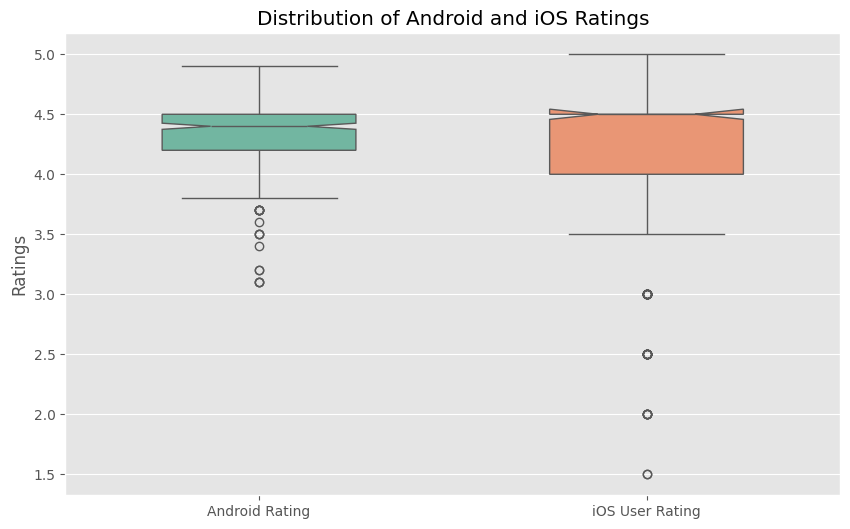

In [27]:
Android_df["App"] = Android_df["App"].str.strip().str.lower()
Ios_df['track_name'] = Ios_df['track_name'].str.strip().str.lower()

merged_data = pd.merge(Android_df, Ios_df, left_on="App", right_on="track_name", how="inner", suffixes=("_android", "_ios"))
merged_data = merged_data[["App", "Rating", "user_rating"]]

plt.figure(figsize=(10, 6))

sns.boxplot(data=[merged_data['Rating'], merged_data['user_rating']], 
            notch=True,  
            widths=0.5,  
            palette='Set2')  

plt.xticks([0, 1], ['Android Rating', 'iOS User Rating'])

plt.title('Distribution of Android and iOS Ratings')
plt.ylabel('Ratings')

plt.show()


In the future, I plan to extend this project by focusing more on visualization techniques. I intend to learn more about seaborn and matplotlib, particularly exploring multivariable relationships using methods like pairplot. I believe that visualization is a fundamental tool for data analysis and will help expand my approach to EDA.

At the same time, I want to analyze features other than rating, which can better help me understand the overall picture of the app market. I hope that the findings from my future analysis can genuinely provide valuable insights for app developers in product design and positioning.